> Apr 12, 2024 | {sub-ref}`wordcount-minutes` min read



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $
$ \newcommand{\lp}{\left(} $
$ \newcommand{\rp}{\right)} $
$ \newcommand{\lc}{\left[} $
$ \newcommand{\rc}{\right]} $
$ \newcommand{\lch}{\left\{} $
$ \newcommand{\rch}{\right\}} $
$ \newcommand{\Lp}{\Bigl(} $
$ \newcommand{\Rp}{\Bigr)} $
$ \newcommand{\Lc}{\Bigl[} $
$ \newcommand{\RC}{\Bigr]} $
$ \newcommand{\Lch}{\Bigl\{} $
$ \newcommand{\Rch}{\Bigr\}} $
$ \newcommand{\rqa}{\quad \Rightarrow \quad} $

# 8. Implementación

:::{contents}
:local:
:depth: 1
:::


:::::{tab-set}
::::{tab-item} Qiskit
```python
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
```
::::
::::{tab-item} Qibo
```python
from qibo import Circuit, gates
import numpy as np
```
::::
:::::


In [1]:
'''Qiskit_code_cell'''
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

Esta sección se basa en {cite}`bib_FTA_Grover_Qiskit_textbook`.

(sec_FTA_grover_imple_MCZ)= 
## Puerta multicontrolada $Z$ (MCZ).

Vamos a empezar viendo la implementación de la puerta multicontrolada $Z$ (MCZ), pues la usaremos bastante el las siguientes secciones. Esta puerta podemos construir a partir de la puerta multicontrolada Toffoli (MCT) de forma muy sencilla. Para ello, recordemos que la MCT no es más que una CNOT (es decir, una puerta $X$) con varios controles y recordemos también la propiedad


```{math}
:label: ec_FTA_grover_Imple_HXH_Z 
\begin{equation} 
HXH = Z .
\end{equation} 
```

Podemos pues construir la MCZ aplicando puertas de Hadammard en el qubit objetivo de la MCT antes y después de la misma.

:::::{tab-set}
::::{tab-item} Qiskit
```python
def mcz(circuit, control_qubits, target_qubit):
    '''
    This funntion implements a multicontroled Z-gate. If all the control_qubits
    are in state |1>, a Z-gate is apply in the qubit called "target_qubit".

    To build this gate we use a multicontrolled Toffoli (mct) gate. To do this, 
    let's first remember that the mct gate is nothing more than a multicontrolled 
    CNOT, which only applies on the target qubit if all the control qubits are 1.

    So, we only need to use the property
        Z = H X H 
    In this way we only have to apply Hadammard gates on the target_qubit before
    and after the mct.

    In summary, the mcz gate adds a pi phase (Z gate) to the |11...1> state.

    Inputs:
        - circuit: Quantum Circuit where we have the "control_reg" and the 
            "target_qubit".

        - control_reg: Qubits that control the gate. It must be one Quantum 
            Register of the previus circuit.

        - target_qubit: Qubit in which we apply the Z gate. It must be one qubit
            of the previus circuit.
    '''
    circuit.h(target_qubit)
    #circuit.mct(control_qubits, target_qubit)  # multi-controlled-toffoli (versiones antiguas de Qiskit)
    circuit.mcx(control_qubits, target_qubit)  # multi-controlled-toffoli
    circuit.h(target_qubit)
```
::::
::::{tab-item} Qibo
```python
# On qibo there is a built-in MCZ gate

```
::::
:::::


In [2]:
'''Qiskit_code_cell'''
def mcz(circuit, control_qubits, target_qubit):
    '''
    This funntion implements a multicontroled Z-gate. If all the control_qubits
    are in state |1>, a Z-gate is apply in the qubit called "target_qubit".

    To build this gate we use a multicontrolled Toffoli (mct) gate. To do this, 
    let's first remember that the mct gate is nothing more than a multicontrolled 
    CNOT, which only applies on the target qubit if all the control qubits are 1.

    So, we only need to use the property
        Z = H X H 
    In this way we only have to apply Hadammard gates on the target_qubit before
    and after the mct.

    In summary, the mcz gate adds a pi phase (Z gate) to the |11...1> state.

    Inputs:
        - circuit: Quantum Circuit where we have the "control_reg" and the 
            "target_qubit".

        - control_reg: Qubits that control the gate. It must be one Quantum 
            Register of the previus circuit.

        - target_qubit: Qubit in which we apply the Z gate. It must be one qubit
            of the previus circuit.
    '''
    circuit.h(target_qubit)
    #circuit.mct(control_qubits, target_qubit)  # multi-controlled-toffoli (versiones antiguas de Qiskit)
    circuit.mcx(control_qubits, target_qubit)  # multi-controlled-toffoli
    circuit.h(target_qubit)

(sec_FTA_grover_imple_difursor)= 
## Difusor genérico.

Como ya comentamos en la sección {ref}`sec_FTA_grover_sub_U_s`, habitualmente en vez de implementar $U_{\Psi_0}$ implementamos $-U_{\Psi_0}$. Vimos además que podemos hacer la implementación mediante transformadas de Walsh-Hadamard $H^{\otimes n}$, puertas $X^{\otimes n}$ y la puerta $MCZ$ de la forma de la Ec. {eq}`ec_FTA_grover_cons-imple_U_Psi0`, es decir


```{math}
:label: ec_FTA_grover_qiskit_diff-gen_U_Psi0 
\begin{equation} 
\boxed{-U_{\Psi_0}  = S_{\Psi_0}  = H^{\otimes n} S_0 H^{\otimes n} = H^{\otimes n} X^{\otimes n} (MCZ) X^{\otimes n} H^{\otimes n}} 
\end{equation} 
``` 

:::::{tab-set}
::::{tab-item} Qiskit
```python
def Grover_Diffuser(circuit, target_reg):
    ''' 
    This function apply the Grover's diffuser to a quantum register.

    Imputs:
        - circuit: It is the Quantum Circuit in which we are going to insert 
            the diffuser gate. It must contain the Quantum Register target_reg.
            It can be something like:
            QuantumCircuit(target_reg, classic_reg)

        - target_reg: Quantum Register in witch we are going to apply the 
            diffuser. 

        - n: Number of qubits in the Quantum Register target_reg

    Output:
        The function has no output. It modiffy the original circuit.
    '''

    n = target_reg.size

    # Apply transformation |s> -> |00..0> (H-gates)
    for i in range(n):
        circuit.h(target_reg[i])

    # Apply transformation |00..0> -> |11..1> (X-gates)
    for i in range(n):
        circuit.x(target_reg[i])

    # Do multi-controlled-Z gate
    mcz(circuit, target_reg[list(range(n-1))], target_reg[n-1])

    # Apply transformation |11..1> -> |00..0>
    for i in range(n):
        circuit.x(target_reg[i])

    # Apply transformation |00..0> -> |s>
    for i in range(n):
        circuit.h(target_reg[i])
```
::::
::::{tab-item} Qibo
```python
def grover_diffuser_qibo(circuit_qibo,ancilla=0):
    """
    This functions generates the Grover diffuser circuit for nqubits. 

    Inputs:
    ------
        - circuit_qibo: `Circuit`. A qibo circuit to add the Grover diffuser
        - ancilla: `int`. Optional. Number of ancilla qubits, no gate is applied to them. 
    Outputs:
    ------
        - circuit_qibo: `Circuit`. A qibo circuit with the Grover diffuser added
        
    """
    nqubits=circuit_qibo.nqubits-ancilla
    


    #this function assumes the ancilla qubits will be the last in the circuit, should me changed otherwise
    circuit_qibo.add([gates.H(i) for i in range(nqubits)])
    circuit_qibo.add([gates.X(i) for i in range(nqubits)])
    # added H and X gates to all qubits

    circuit_qibo.add(gates.Z(nqubits - 1).controlled_by(*range(nqubits)[0 : len(range(nqubits - 1))]))
    # CZ to all qubits. Target qubit election does not matter

    circuit_qibo.add([gates.X(i) for i in range(nqubits)])
    circuit_qibo.add([gates.H(i) for i in range(nqubits)])
    # added X and H gates to all qubits

    

    return circuit_qibo
```
::::
:::::


In [3]:
'''Qiskit_code_cell'''
def Grover_Diffuser(circuit, target_reg):
    ''' 
    This function apply the Grover's diffuser to a quantum register.

    Imputs:
        - circuit: It is the Quantum Circuit in which we are going to insert 
            the diffuser gate. It must contain the Quantum Register target_reg.
            It can be something like:
            QuantumCircuit(target_reg, classic_reg)

        - target_reg: Quantum Register in witch we are going to apply the 
            diffuser. 

        - n: Number of qubits in the Quantum Register target_reg

    Output:
        The function has no output. It modiffy the original circuit.
    '''

    n = target_reg.size

    # Apply transformation |s> -> |00..0> (H-gates)
    for i in range(n):
        circuit.h(target_reg[i])

    # Apply transformation |00..0> -> |11..1> (X-gates)
    for i in range(n):
        circuit.x(target_reg[i])

    # Do multi-controlled-Z gate
    mcz(circuit, target_reg[list(range(n-1))], target_reg[n-1])

    # Apply transformation |11..1> -> |00..0>
    for i in range(n):
        circuit.x(target_reg[i])

    # Apply transformation |00..0> -> |s>
    for i in range(n):
        circuit.h(target_reg[i])

La función anterior es genérica: dado un circuito y un registro cuántico, esta función aplica un difusor de Grover en el registro. En la Fig. \ref{Fig_Imple_diffuser} el resultado de aplicar la función anterior sobre un circuito.

Veamos un ejemplo con esta función:

:::::{tab-set}
::::{tab-item} Qiskit
```python
n = 6

quantum_reg = QuantumRegister(n)
classic_reg = ClassicalRegister(n)

circuit = QuantumCircuit(quantum_reg, classic_reg)

Grover_Diffuser(circuit, quantum_reg)

circuit.draw(output='mpl')
```
::::
::::{tab-item} Qibo
```python
n=6
circuit_qibo=Circuit(n)
print(grover_diffuser_qibo(circuit_qibo).draw())
```
::::
:::::


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny_2/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


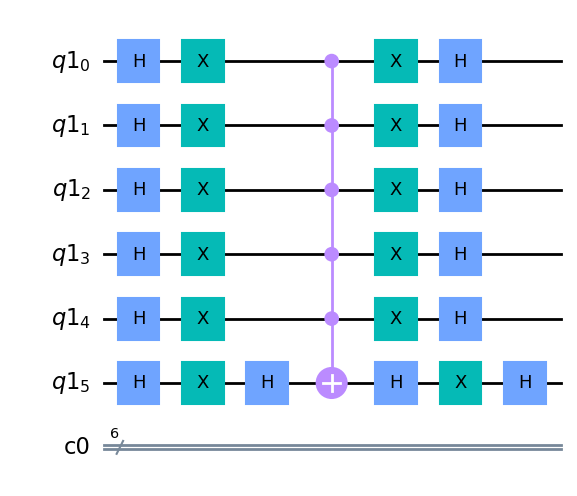

In [4]:
'''Qiskit_code_cell'''
n = 6

quantum_reg = QuantumRegister(n)
classic_reg = ClassicalRegister(n)

circuit = QuantumCircuit(quantum_reg, classic_reg)

Grover_Diffuser(circuit, quantum_reg)

circuit.draw(output='mpl')

(sec_FTA_grover_imple_trivial_oracle)= 
## Oráculo "trivial".

Vamos a presentar en esta sección un código de para construir un oráculo que cambie el signo de los estados que nosotros le digamos. Este es uno de esos ejemplo típicos que se plantean cuando se habla de Grover, esos en los que sabemos con antelación los estados concretos que queremos buscar. De esta forma, el oráculo que construimos está hecho "ad hoc" para marcar ciertos estado. Precisamente elegimos llamarle a este caso "trivial" porque no entraña ningún misterio, sino que como comentamos, es un caso académico. 

El código que se presenta a continuación es muy simple. Partimos de una lista de cadenas binarias de n bits que llamamos `M_list_bin_qiskit`. Por ejemplo, para $n=5$

\begin{equation}
\text{M_list_bin_qiskit} = [\text{'} 01101 \text{'}, \text{'} 11000 \text{'}, ...]
\end{equation}

::::::{admonition} Nota
:class: note


     
Recordemos que en qiskit el bit menos significativo es que va arriaba en el circuito, así que 	el "qiskit" en el nombre de la lista <code>M_list_bin_qiskit</code> hace referencia que estamos mandando las cadenas el revés. Es decir, para pasarlas a decimal las invertimos:

$$
01101 \quad \rightarrow \quad 10110 = 22, \qquad
11000 \quad \rightarrow \quad 00011 = 3
$$
    
::::::


Para cambiar el signo de un estado lo que tenemos que hacer es aplicar una MCZ. Como esta solo aplica sobre el estado $|11\dots 1 \rangle$, lo que hay que hacer es aplicar puertas $X$ antes y después del la MCZ en los qubit correspondientes a las posiciones donde tenemos un 0 en las cadenas bits.

:::::{tab-set}
::::{tab-item} Qiskit
```python
def Grover_Oracle_trivial(circuit, target_reg, M_list_bin_qiskit): # n, M_list_bin):
    '''
    This function implements a Grover oracle. We call it "trivial" because this
    oracle change the sign of some given states. That is, we know the solution 
    in advance. (For example, we want to find the states |101> and |110> among 
    the 8 possible ones. We know from the begining the states we want to find.)

    We can use the multicontrolled Z gate (mcz) we defined earlier to change the
    sign of any M_list_bin[i] state. Simply apply X gates before and after the 
    mcz on the qubits that are worth zero in M_list_bin[i].

    IMPORTANT !!!: Remember that if we deal with qiskit, the binary strings have
    to 	come upside	down (with the LEASTE SIGNIFICANT BIT AT THE BEGINNING !!!).

    Inputs:
        - circuit: Quantum Circuit

        - target_reg: Quantum Register (with n qubits) in which we are going to 
            search and change the sign of some given states. It must be one 
            Quantum Register of the previus circuit.

        - M_list_bin: Python List with the states that we want to find. The 
            states must be in binary and must have length n (that is, if our 
            "targer_reg" has 4 qubits and we want to find the state |2>, we have
            to pass in this list the number "0010", not "10" !!!)

    '''
    n = target_reg.size

    for m in M_list_bin_qiskit:
        for i in range(len(m)):
            if m[i] == '0':
                circuit.x(target_reg[i])

        mcz(circuit, target_reg[list(range(n-1))], target_reg[n-1])

        for i in range(len(m)):
            if m[i] == '0':
                circuit.x(target_reg[i])
```
::::
::::{tab-item} Qibo
```python
def Grover_oracle_trivial_qibo(circuit_qibo, M_list_bin_qibo):
    """
    This functions generates a Grover oracle that phase-tags a list of binary numbers.
    Each number get tagged by a CZ gate applied to all qubits and X gates applied before and after the CZ to the qubits corresponding with '0's in each binary number.

    Inputs:
    ------
        - nqubits: `int`. Number of qubits of the circuit
        - list_desired: `list` of `ints`. The binary form of each int must fit in nqubits bits

    Outputs:
    ------
        - oracle: `circuit`, that phase-tags the desired states
        
    """
    nqubits=circuit_qibo.nqubits
    oracle = Circuit(nqubits)  #starts an empty circuit of nqubits

    for b in M_list_bin_qibo:
        for j, i in enumerate(b): 
            #add a X gate to each qubit corresponding with '0' in the binary number
            if i == "0": 
                oracle.add(gates.X(j))

        oracle.add(gates.Z(nqubits - 1).controlled_by(*range(nqubits)[0 : len(range(nqubits - 1))]))  
        # CZ to all qubits. Target qubit election does not matter

        for j, i in enumerate(b): 
            #add a X gate to each qubit corresponding with '0' in the binary number
            if i == "0":
                oracle.add(gates.X(j))
    circuit_qibo=circuit_qibo+oracle
    return circuit_qibo
```
::::
:::::


In [5]:
'''Qiskit_code_cell'''
def Grover_Oracle_trivial(circuit, target_reg, M_list_bin_qiskit): # n, M_list_bin):
    '''
    This function implements a Grover oracle. We call it "trivial" because this
    oracle change the sign of some given states. That is, we know the solution 
    in advance. (For example, we want to find the states |101> and |110> among 
    the 8 possible ones. We know from the begining the states we want to find.)

    We can use the multicontrolled Z gate (mcz) we defined earlier to change the
    sign of any M_list_bin[i] state. Simply apply X gates before and after the 
    mcz on the qubits that are worth zero in M_list_bin[i].

    IMPORTANT !!!: Remember that if we deal with qiskit, the binary strings have
    to 	come upside	down (with the LEASTE SIGNIFICANT BIT AT THE BEGINNING !!!).

    Inputs:
        - circuit: Quantum Circuit

        - target_reg: Quantum Register (with n qubits) in which we are going to 
            search and change the sign of some given states. It must be one 
            Quantum Register of the previus circuit.

        - M_list_bin: Python List with the states that we want to find. The 
            states must be in binary and must have length n (that is, if our 
            "targer_reg" has 4 qubits and we want to find the state |2>, we have
            to pass in this list the number "0010", not "10" !!!)

    '''
    n = target_reg.size

    for m in M_list_bin_qiskit:
        for i in range(len(m)):
            if m[i] == '0':
                circuit.x(target_reg[i])

        mcz(circuit, target_reg[list(range(n-1))], target_reg[n-1])

        for i in range(len(m)):
            if m[i] == '0':
                circuit.x(target_reg[i])

Veamos un ejemplo con este código:

:::::{tab-set}
::::{tab-item} Qiskit
```python
# We import functions from the scripts in ..\..\Code folder
n = 5

quantum_reg = QuantumRegister(n)
classic_reg = ClassicalRegister(n)

circuit = QuantumCircuit(quantum_reg, classic_reg)

M_list_bin = [ '01101', '11000']


Grover_Oracle_trivial(circuit, quantum_reg, M_list_bin)

circuit.draw(output='mpl', filename = 'Fig_Imple_oracle_trivial')
```
::::
::::{tab-item} Qibo
```python

M_list_bin = [ '01101', '11000']
#To get the same result with Qibo as with Qiskit, we must flip the order of bits in the strings:
M_list_bin_qibo=[i[::-1]for i in (M_list_bin)]


n=5
circuit_qibo=Circuit(n)
print(Grover_oracle_trivial_qibo(circuit_qibo,M_list_bin_qibo).draw())
```
::::
:::::


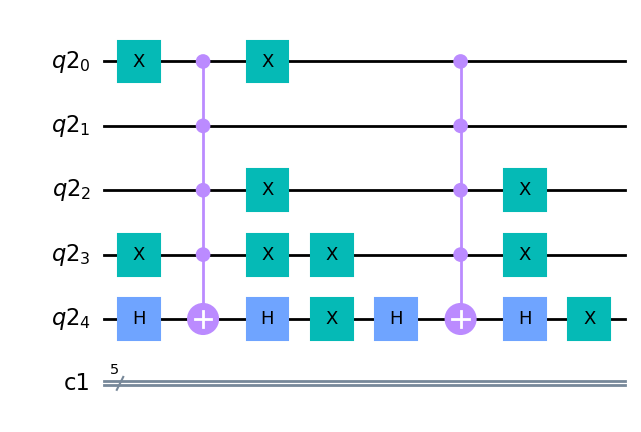

In [6]:
'''Qiskit_code_cell'''
# We import functions from the scripts in ..\..\Code folder
n = 5

quantum_reg = QuantumRegister(n)
classic_reg = ClassicalRegister(n)

circuit = QuantumCircuit(quantum_reg, classic_reg)

M_list_bin = [ '01101', '11000']


Grover_Oracle_trivial(circuit, quantum_reg, M_list_bin)

circuit.draw(output='mpl', filename = 'Fig_Imple_oracle_trivial')

(sec_FTA_grover_imple_oracle_condiciones)= 
## Oráculos que verifican condiciones.

En esta sección vamos a ver como se puede usar el algoritmo de Grover para buscar cadenas de bits que satisfacen unas ciertas condiciones. En concreto vamos a ver dos caso: como solucionar un **sudoku 2x2** y como calcular todas las posibles permutaciones de $P$ números.

(sec_FTA_grover_imple_sub_sudoku2x2)= 
### Sudoku 2x2

#### El sudoku

Vamos a ver en esta sección como construir un oráculo que resuelva un sudoku 2x2 de la forma:

\begin{equation}
	\lc
	\begin{matrix}
	V_0 & V_1 \\
	V_2 & V_3
	\end{matrix}
	\rc
\end{equation}

#### Condiciones y puerta XOR

En un sudoku tiene que cumplirse que no se repitan números en las filas ni en las columnas, así que las condiciones que tienen que verificar las variables de sudoku 2x2 son:

\begin{equation}
V_0 \neq V_1, \qquad 
V_0 \neq V_2, \qquad
V_2 \neq V_3, \qquad
V_1 \neq V_3.
\end{equation}

Por comodidad, podemos compilar este conjunto de comparaciones en una lista de cláusulas:

In [7]:
clause_list = [ [0,1],  [0,2],  [1,3],  [2,3] ]

Para verificar estas condiciones podemos usar un qubit ancilla y usar la puerta XOR (se puede ver el código a continuación). Como el qubit ancilla parte del estado $|0\rangle$, esta puerta lo que hace ponerlo a en el estado $|1\rangle$ si la condición se verifica.

:::::{tab-set}
::::{tab-item} Qiskit
```python
def XOR_2qubits(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)
```
::::
::::{tab-item} Qibo
```python
def XOR_2qubits_qibo(circuit_qibo, a, b, output):
    circuit_qibo.add(gates.X(output).controlled_by(a))
    circuit_qibo.add(gates.X(output).controlled_by(b))
    return circuit_qibo
```
::::
:::::


In [8]:
'''Qiskit_code_cell'''
def XOR_2qubits(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

Veamos un ejemplo de la XOR

:::::{tab-set}
::::{tab-item} Qiskit
```python
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR_2qubits(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw(output = 'mpl', filename = 'Fig_Imple_xor')
```
::::
::::{tab-item} Qibo
```python
circuit_qibo=Circuit(3)
print(XOR_2qubits_qibo(circuit_qibo, a=0, b=1, output=2).draw())

```
::::
:::::


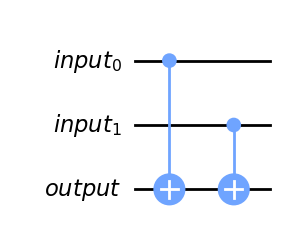

In [9]:
'''Qiskit_code_cell'''
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR_2qubits(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw(output = 'mpl', filename = 'Fig_Imple_xor')

Para generar el oráculo del sudoku podemos usar 4 qubits ancila (uno por condición a verificar) y usar la puerta XOR 4 veces. Pero con esto aún no tenemos el oráculo, pues nos falta verificar si todas las condiciones se cumplen y cambiar el signo del estado. Para ello, podemos usar una puerta MCT que tenga como controles los 4 cubits ancilla y que se aplique sobre un quinto qubit que esté en el estado $|-\rangle$. De esta forma, la puerta MCT solo se aplicará si se cumplen las 4 condiciones. Por último, solo nos faltaría volver a aplicar las puertas XOR para limpiar los qubits ancilla. El resultado final sería el siguiente:

:::::{tab-set}
::::{tab-item} Qiskit
```python
def Grover_Oracle_Sudoku_2x2(circuit, conditions_list, ancilla_reg, 
                             output_qubit, print_oracle = 1):
    '''
    This oracle solves the problem of a Sudoku 2x2. 
    '''
    # Compute clauses
    i = 0
    for clause in conditions_list:
        XOR_2qubits(circuit, clause[0], clause[1], ancilla_reg[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    #circuit.mct(ancilla_reg, output_qubit)
    circuit.mcx(ancilla_reg, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in conditions_list:
        XOR_2qubits(circuit, clause[0], clause[1], ancilla_reg[i])
        i += 1

    if print_oracle == 0:
        circuit.draw(output='mpl', fold = -1, filename = '3-Fig_Oracle_Sudoku_2x2')
```
::::
::::{tab-item} Qibo
```python
def Grover_Oracle_Sudoku_2x2_qibo(circuit_qibo, conditions_list,n):

    '''
    This oracle solves the problem of a Sudoku 2x2. 
    '''
    total_qubits=circuit_qibo.nqubits

    ancilla_reg = len(conditions_list)
    
    var_reg = n

    # Compute clauses, notice the inverse order to match qiskit's ordering
    for j,clause in enumerate(conditions_list):
        XOR_2qubits_qibo(circuit_qibo,clause[1], clause[0], var_reg+j)

    # Flip 'output' bit if all clauses are satisfied
    circuit_qibo.add(gates.X(total_qubits-1).controlled_by(*range(total_qubits)[n : len(range(total_qubits - 2))]))

    # Uncompute clauses
    for j,clause in enumerate(conditions_list):
        XOR_2qubits_qibo(circuit_qibo,clause[1], clause[0], var_reg+j)

    return circuit_qibo


```
::::
:::::


In [10]:
'''Qiskit_code_cell'''
def Grover_Oracle_Sudoku_2x2(circuit, conditions_list, ancilla_reg, 
                             output_qubit, print_oracle = 1):
    '''
    This oracle solves the problem of a Sudoku 2x2. 
    '''
    # Compute clauses
    i = 0
    for clause in conditions_list:
        XOR_2qubits(circuit, clause[0], clause[1], ancilla_reg[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    #circuit.mct(ancilla_reg, output_qubit)
    circuit.mcx(ancilla_reg, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in conditions_list:
        XOR_2qubits(circuit, clause[0], clause[1], ancilla_reg[i])
        i += 1

    if print_oracle == 0:
        circuit.draw(output='mpl', fold = -1, filename = '3-Fig_Oracle_Sudoku_2x2')

Veamos el circuito. Lo primero que tenemos que tener en cuenta es que el oráculo tiene que aplicarse un número concreto de veces:

$$
T = \frac{\pi}{4} \sqrt{\frac{N}{M}}
$$

Definamos pues la función que calcule este número:

In [11]:
def Iterations_T(N, M):

    return int(np.pi/4 * np.sqrt(N/M)) # rounding by truncation

Veamos ahora el circuito:

:::::{tab-set}
::::{tab-item} Qiskit
```python
n = 4
N = 2**n # Total number of states
M = 2    # Number of solutions


var_reg = QuantumRegister(n, name='v')
ancilla_reg = QuantumRegister(len(clause_list), name='c')
output_qubit = QuantumRegister(1, name='out')
classic_reg = ClassicalRegister(n, name='cbits')
circuit = QuantumCircuit(var_reg, ancilla_reg, output_qubit, classic_reg)

# Initialize 'out0' in state |->
circuit.x(output_qubit)
circuit.h(output_qubit)

# Initialize qubits in state |s>
circuit.h(var_reg)
circuit.barrier()  # for visual separation

T = Iterations_T(N,M)

for i in range(T):
    Grover_Oracle_Sudoku_2x2(circuit, clause_list, ancilla_reg, 
                             output_qubit, print_oracle = i)
    if i == 0:
        display(circuit.draw(output='mpl', fold = -1))  
    circuit.barrier()  # for visual separation
    Grover_Diffuser(circuit, var_reg)


# Measure the variable qubits
circuit.measure(var_reg, classic_reg)
```
::::
::::{tab-item} Qibo
```python

n = 4
N = 2**n # Total number of states
M = 2    # Number of solutions
total_qubits=n+1+len(clause_list)
circuit_qibo=Circuit(total_qubits)

# Initialize 'out0' in state |->

circuit_qibo.add(gates.X(total_qubits-1))
circuit_qibo.add(gates.H(total_qubits-1))

# Initialize qubits in state |s>
circuit_qibo.add([gates.H(i) for i in range(n)])

T = Iterations_T(N,M)

for i in range(T):
    Grover_Oracle_Sudoku_2x2_qibo(circuit_qibo,clause_list,n) 
    grover_diffuser_qibo(circuit_qibo, ancilla=total_qubits-n)


circuit_qibo.add([gates.M(i) for i in range(n)])
print(circuit_qibo.draw())
```
::::
:::::


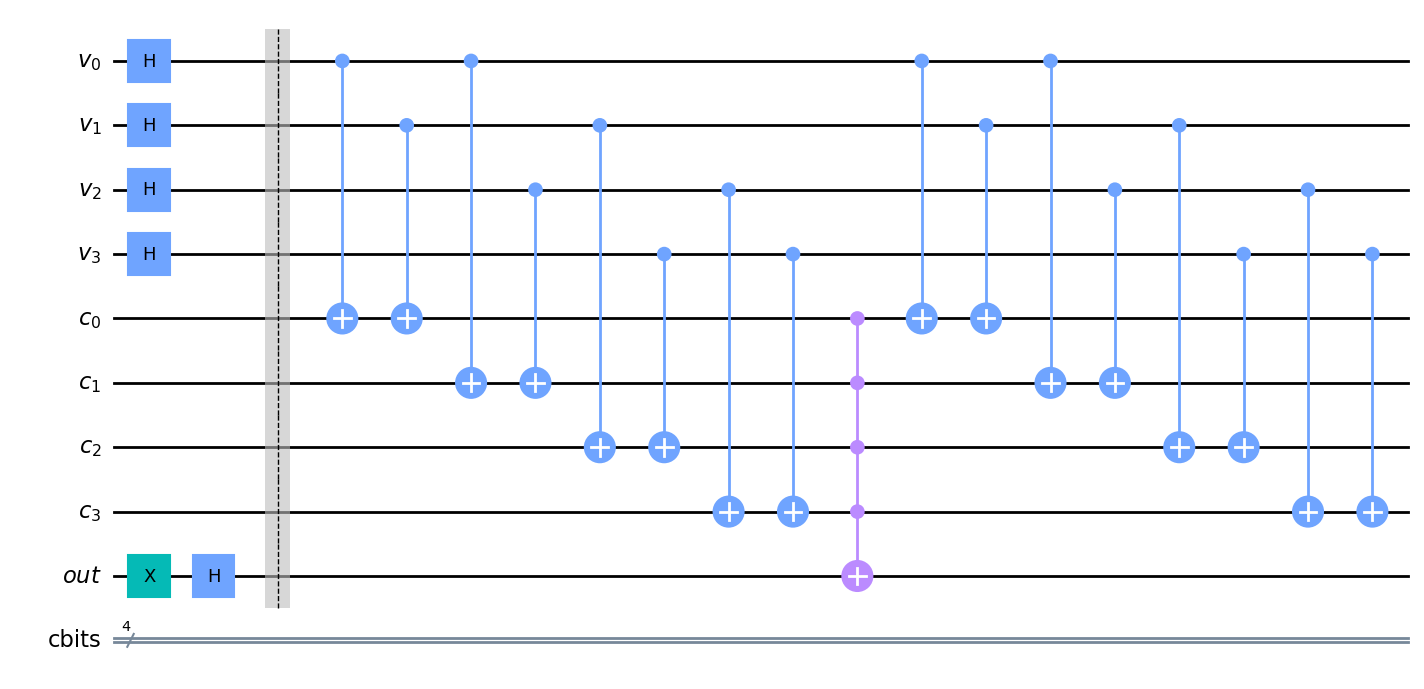

In [12]:
'''Qiskit_code_cell'''
n = 4
N = 2**n # Total number of states
M = 2    # Number of solutions


var_reg = QuantumRegister(n, name='v')
ancilla_reg = QuantumRegister(len(clause_list), name='c')
output_qubit = QuantumRegister(1, name='out')
classic_reg = ClassicalRegister(n, name='cbits')
circuit = QuantumCircuit(var_reg, ancilla_reg, output_qubit, classic_reg)

# Initialize 'out0' in state |->
circuit.x(output_qubit)
circuit.h(output_qubit)

# Initialize qubits in state |s>
circuit.h(var_reg)
circuit.barrier()  # for visual separation

T = Iterations_T(N,M)

for i in range(T):
    Grover_Oracle_Sudoku_2x2(circuit, clause_list, ancilla_reg, 
                             output_qubit, print_oracle = i)
    if i == 0:
        display(circuit.draw(output='mpl', fold = -1))  
    circuit.barrier()  # for visual separation
    Grover_Diffuser(circuit, var_reg)


# Measure the variable qubits
circuit.measure(var_reg, classic_reg)

#### Simulación

Podemos ahora construir el circuito completo y ejecutar la simulación. (En realidad, ya se construyó en la celda anterior. Aquí solo lo dibujamos completo) 

:::::{tab-set}
::::{tab-item} Qiskit
```python
circuit.draw(output='mpl', fold = -1, filename = '3-Fig_Sudoku_2x2')
```
::::
::::{tab-item} Qibo
```python
print(circuit_qibo.draw())
```
::::
:::::


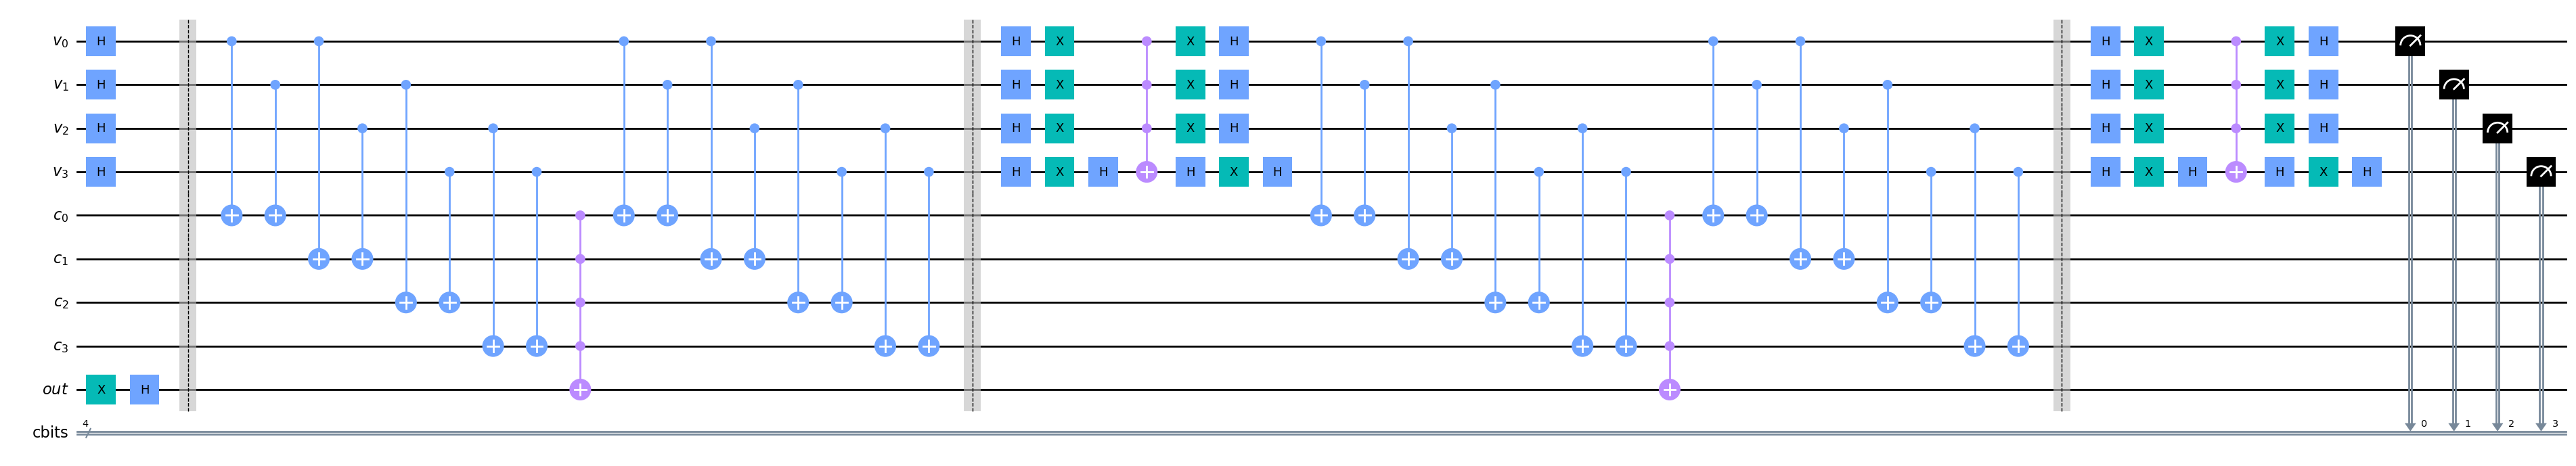

In [13]:
'''Qiskit_code_cell'''
circuit.draw(output='mpl', fold = -1, filename = '3-Fig_Sudoku_2x2')

:::::{tab-set}
::::{tab-item} Qiskit
```python
sim = AerSimulator(method = 'statevector')
tcircuit = transpile(circuit, sim)
result = sim.run(tcircuit).result()

counts = result.get_counts()

keys_bin = list(counts.keys())


values = list(counts.values())
zip_list = zip(keys_bin,values)
zip_sorted = list(sorted(zip_list, key = lambda x: -x[1]))
keys_bin, values = zip(*list(zip_sorted))

num_sols = len(list(zip_sorted))

print_range = 2 + 2 
if num_sols < print_range:
    print_range = num_sols

print('Solving the sudoku 2x2:')
print('    v0  v1')
print('    v2  v3')
print('The results takes the form: v0v1v2v3')
print(f'\nThe algorithm found {num_sols} results.')
print(f'The {print_range} results with more counts are:')
print('\n   Result | Counts')
for i in range(print_range):
    print('  ',list(zip_sorted)[i])
```
::::
::::{tab-item} Qibo
```python
result_qibo= circuit_qibo(nshots=1000)

keys_bin_qibo = list(result_qibo.frequencies(binary=True).keys())
values_qibo = list(result_qibo.frequencies(binary=True).values())
zip_list_qibo = zip(keys_bin_qibo,values_qibo)
zip_sorted_qibo = list(sorted(zip_list_qibo, key = lambda x: -x[1]))
keys_bin_qibo, values_qibo= zip(*list(zip_sorted_qibo))

num_sols_qibo = len(list(zip_sorted_qibo))

print_range_qibo = 2 + 2 
if num_sols_qibo < print_range_qibo:
    print_range_qibo = num_sols_qibo

print('Solving the sudoku 2x2:')
print('    v0  v1')
print('    v2  v3')
print('The results takes the form: v0v1v2v3')
print(f'\nThe algorithm found {num_sols_qibo} results.')
print(f'The {print_range_qibo} results with more counts are:')
print('\n   Result | Counts')
for i in range(print_range_qibo):
    print('  ',list(zip_sorted_qibo)[i])
```
::::
:::::


In [14]:
'''Qiskit_code_cell'''
sim = AerSimulator(method = 'statevector')
tcircuit = transpile(circuit, sim)
result = sim.run(tcircuit).result()

counts = result.get_counts()

keys_bin = list(counts.keys())


values = list(counts.values())
zip_list = zip(keys_bin,values)
zip_sorted = list(sorted(zip_list, key = lambda x: -x[1]))
keys_bin, values = zip(*list(zip_sorted))

num_sols = len(list(zip_sorted))

print_range = 2 + 2 
if num_sols < print_range:
    print_range = num_sols

print('Solving the sudoku 2x2:')
print('    v0  v1')
print('    v2  v3')
print('The results takes the form: v0v1v2v3')
print(f'\nThe algorithm found {num_sols} results.')
print(f'The {print_range} results with more counts are:')
print('\n   Result | Counts')
for i in range(print_range):
    print('  ',list(zip_sorted)[i])

Solving the sudoku 2x2:
    v0  v1
    v2  v3
The results takes the form: v0v1v2v3

The algorithm found 16 results.
The 4 results with more counts are:

   Result | Counts
   ('1001', 492)
   ('0110', 481)
   ('0011', 7)
   ('1000', 6)


:::::{tab-set}
::::{tab-item} Qiskit
```python
fig = plot_histogram(result.get_counts())

fig.tight_layout()

fig
```
::::
::::{tab-item} Qibo
```python
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(sorted(keys_bin_qibo), [x for _,x in sorted(zip(keys_bin_qibo, values_qibo))])
for i in range(len(sorted(keys_bin_qibo))):
    plt.text(i,[x for _,x in sorted(zip(keys_bin_qibo, values_qibo))][i]+2,[x for _,x in sorted(zip(keys_bin_qibo, values_qibo))][i], ha='center')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()

```
::::
:::::


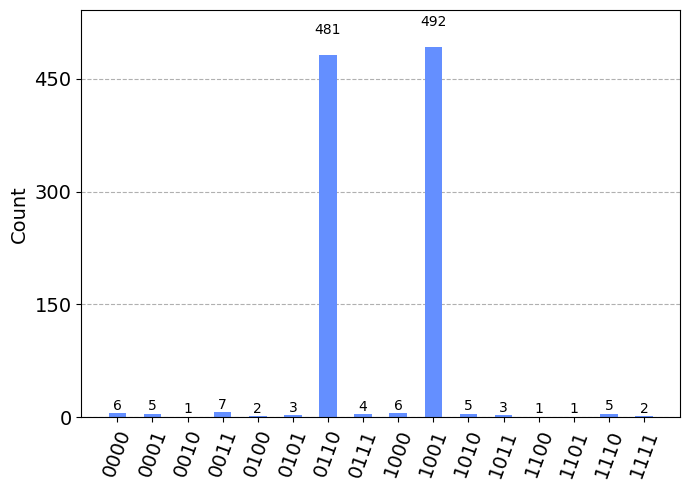

In [15]:
'''Qiskit_code_cell'''
fig = plot_histogram(result.get_counts())

fig.tight_layout()

fig

---
Autores:

David Castaño ([UMA-SCBI](https://www.scbi.uma.es/site/)), Raul Fuentes ([BSC-CNS](https://www.bsc.es/es)), Daniel Talaván  ([COMPUTAEX](https://www.cenits.es/)), Francisco Matanza ([UNICAN](https://web.unican.es/))

<img src="images/Logo_UMA.jpeg"  width="170px">
<img src="images/BSC-blue-medium.png" width="195px">
<img src="images/COMPUTAEX.jpg" width="170px">
<img src="images/Logo_UNICAM.jpg" width="210px">


---
::::{figure} https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png
:width: 2000px
:align: center
::::

<center>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">
<img aling="left" alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
</center>

License: <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licencia Creative Commons Atribución-CompartirIgual 4.0 Internacional</a>.

This work has been financially supported by the Ministry for Digital Transformation and of Civil Service of the Spanish Government through the QUANTUM ENIA project call - Quantum Spain project, and by the European Union through the Recovery, Transformation and Resilience Plan - NextGenerationEU within the framework of the Digital Spain 2026 Agenda.

<center>
<img align="left" src="https://quantumspain-project.es/wp-content/uploads/2024/02/Banner-QS_GOB_v2.png" width="1000px" />
</center>